In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as plt_ex

In [2]:
datasetTweetsCSVPath = "./dataset/tweets.csv"

In [3]:
df_tweets = pd.read_csv(datasetTweetsCSVPath, sep=',', index_col=0)

In [4]:
df_tweets.shape

(13664696, 9)

In [5]:
df_tweets.text = df_tweets.text.apply(lambda x:x.lower().strip() if type(x) == str else x)

In [6]:
df_tweets = df_tweets.drop_duplicates(keep='first')

In [7]:
df_tweets.shape

(11712091, 9)

In [8]:
df_tweets[df_tweets.text == ""]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
1197679862,19300510,0,0,0,0,0,0,2014-02-13 01:59:29,


In [9]:
df_tweets.loc[df_tweets.text == "", "text"] = np.nan

In [10]:
df_tweets.loc["1197679862"]

user_id                      19300510
retweet_count                       0
reply_count                         0
favorite_count                      0
num_hashtags                        0
num_urls                            0
num_mentions                        0
created_at        2014-02-13 01:59:29
text                              NaN
Name: 1197679862, dtype: object

In [11]:
df_tweets.text.isna().sum()

530032

In [8]:
def IsInteger(num):
    try:
        val = float(num)
        return float.is_integer(val)
    except ValueError:
        return False

def countIntegers(df, attr):
    numbers = df_tweets[attr].apply(IsInteger).sum()
    print("Number of not NaN integers", numbers)
    
def object_to_numeric(df, attr):
    print("Type before conversion:", df[attr].dtype)
    old_missingval = df[attr].isna().sum()
    print("Missing values before conversion:", old_missingval)
    # coerces non-numeric junk to NaNs
    df[attr] = pd.to_numeric(df[attr], errors='coerce', downcast='integer')
    #df[attr].fillna(-1).astype(np.int64)
    new_missingval = df[attr].isna().sum()
    print("Missing values after conversion:", new_missingval)
    print("Type after conversion:", df[attr].dtype)
    print("Min:", df[attr].min(), "\tMax:", df[attr].max())

In [13]:
countIntegers(df_tweets, "user_id")

Number of not NaN integers 11278203


In [14]:
object_to_numeric(df_tweets, "user_id")

Type before conversion: object
Missing values before conversion: 217276
Missing values after conversion: 433888
Type after conversion: float64
Min: 0.0 	Max: 2.9999999999999998e+296


In [9]:
countIntegers(df_tweets, "retweet_count")

Number of not NaN integers 11086634


In [10]:
object_to_numeric(df_tweets, "retweet_count")

Type before conversion: object
Missing values before conversion: 437134
Missing values after conversion: 625456
Type after conversion: float64
Min: 0.0 	Max: inf


In [11]:
df_tweets[df_tweets.retweet_count == np.inf]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
25722144302443379,201350011,inf,NaN,NaN,NaN,NaN,NaN,2018-05-05 15:15:05,@enlajugadarcn @casaleantonio @jorgebermudezh ...


In [12]:
df_tweets.loc[df_tweets.retweet_count == np.inf] = np.nan

In [13]:
df_tweets[df_tweets.retweet_count == np.inf]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,


In [17]:
countIntegers(df_tweets, "reply_count")

Number of not NaN integers 10902591


In [18]:
object_to_numeric(df_tweets, "reply_count")

Type before conversion: object
Missing values before conversion: 647873
Missing values after conversion: 809499
Type after conversion: float64
Min: 0.0 	Max: inf


In [39]:
df_tweets[df_tweets.reply_count == np.inf]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
732386427,466377491.0,0.0,inf,1.0,0.0,NaN,0.0,2019-08-29 13:04:45,prima di andare via sorridi un po' ma comunque...


In [41]:
df_tweets.loc[df_tweets.reply_count == np.inf] = np.nan

In [42]:
df_tweets[df_tweets.reply_count == np.inf]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,


In [19]:
countIntegers(df_tweets, "favorite_count")

Number of not NaN integers 10903995


In [20]:
object_to_numeric(df_tweets, "favorite_count")

Type before conversion: object
Missing values before conversion: 647541
Missing values after conversion: 808096
Type after conversion: float64
Min: -1.0 	Max: 7e+211


In [44]:
df_tweets[df_tweets.favorite_count == -1]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
521392611366797312,466480215.0,1.0,0.0,-1.0,0.0,0.0,0.0,2019-10-14 20:11:00,studiare studiar studi stud stu st sto stoc st...


In [45]:
df_tweets.loc[df_tweets.favorite_count == -1] = np.nan

In [46]:
df_tweets[df_tweets.favorite_count == -1]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,


In [21]:
countIntegers(df_tweets, "num_hashtags")

Number of not NaN integers 10548430


In [22]:
object_to_numeric(df_tweets, "num_hashtags")

Type before conversion: object
Missing values before conversion: 1057508
Missing values after conversion: 1163661
Type after conversion: float64
Min: 0.0 	Max: 7e+153


In [23]:
countIntegers(df_tweets, "num_urls")

Number of not NaN integers 10903150


In [24]:
object_to_numeric(df_tweets, "num_urls")

Type before conversion: object
Missing values before conversion: 648611
Missing values after conversion: 808941
Type after conversion: float64
Min: 0.0 	Max: 1e+210


In [25]:
countIntegers(df_tweets, "num_mentions")

Number of not NaN integers 10724117


In [26]:
object_to_numeric(df_tweets, "num_mentions")

Type before conversion: object
Missing values before conversion: 854149
Missing values after conversion: 987974
Type after conversion: float64
Min: 0.0 	Max: 6.0000000000000004e+97


In [27]:
df_tweets.created_at = pd.to_datetime(df_tweets.created_at, format='%Y-%m-%d %H:%M:%S')
print("Min:", df_tweets.created_at.min(), "\tMax:", df_tweets.created_at.max())

Min: 1953-04-17 12:24:33 	Max: 2040-04-27 11:03:25


In [28]:
invalid_created_at = df_tweets.loc[(df_tweets["created_at"] < '2012-01-01') | (df_tweets["created_at"] > '2020-12-31')]
invalid_created_at

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
337410935437272894,1.482442e+07,0.0,0.0,0.0,1.0,0.0,1.0,1960-04-26 18:05:56,@arvixesupport shared ssl stopped working on a...
241606582771852729,1.480228e+08,0.0,0.0,0.0,0.0,0.0,0.0,2038-06-22 08:28:55,faqat nabz se haal zaahir na hoga\nmera dil bh...
20477344093836797,1.462660e+07,0.0,0.0,0.0,0.0,0.0,1.0,1958-03-15 16:54:57,@nancyjensen harry &amp; dwntwn 95% clear of s...
890932030,1.521942e+08,0.0,0.0,0.0,0.0,0.0,1.0,2040-02-29 13:20:29,@shuinkou ......./hopes senpie stay healthy......
814741272377044956,1.852826e+09,0.0,0.0,0.0,1.0,0.0,0.0,1959-05-02 23:16:40,her tl is sooo dead omgg #herbff
...,...,...,...,...,...,...,...,...,...
108516312,1.494211e+08,1.0,0.0,0.0,0.0,0.0,2.0,2040-04-20 01:24:22,@yungtrello @rekofromthe5 yes you are
81718936,5.054330e+08,0.0,0.0,0.0,0.0,0.0,0.0,1960-03-17 01:36:18,i hate when people eat and they talk. then the...
119550211118647,1.858934e+09,1730.0,0.0,0.0,0.0,0.0,1.0,1960-03-18 12:53:14,rt @chiiiout: i want to do so much more in thi...


In [29]:
df_tweets.loc[invalid_created_at.index, "created_at"] = np.nan

In [30]:
df_tweets.created_at.isna().sum()

97631

In [34]:
print("Min:", df_tweets.created_at.min(), "\tMax:", df_tweets.created_at.max())

Min: 2012-03-11 22:25:59 	Max: 2020-05-03 10:36:12


In [35]:
df_tweets.dtypes

user_id                  float64
retweet_count            float64
reply_count              float64
favorite_count           float64
num_hashtags             float64
num_urls                 float64
num_mentions             float64
created_at        datetime64[ns]
text                      object
dtype: object

In [14]:
def hist(df, column):
    numberOfBins = int(np.log2(len(df[column][df[column].notna()])) + 1)
    print("Number of bins:", numberOfBins)
    df[column].plot(kind='hist', title=column, bins=numberOfBins)
    plt.ylabel("count")
    plt.show()

<AxesSubplot: >

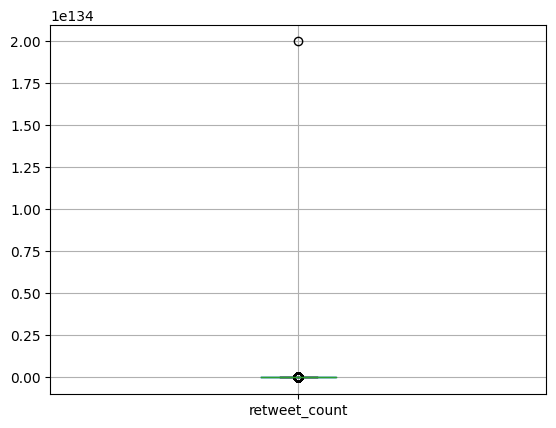

In [15]:
df_tweets.boxplot(column='retweet_count')

Number of bins: 24


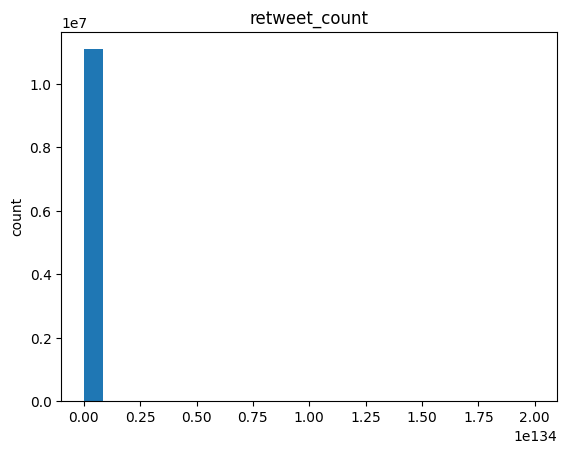

In [16]:
hist(df_tweets, "retweet_count")

In [17]:
def log_scale(df, column):
    return pd.DataFrame(np.log10(1+df[column][df[column].notna()]))

In [18]:
retweet_count_log_scale = log_scale(df_tweets, "retweet_count")

<AxesSubplot: >

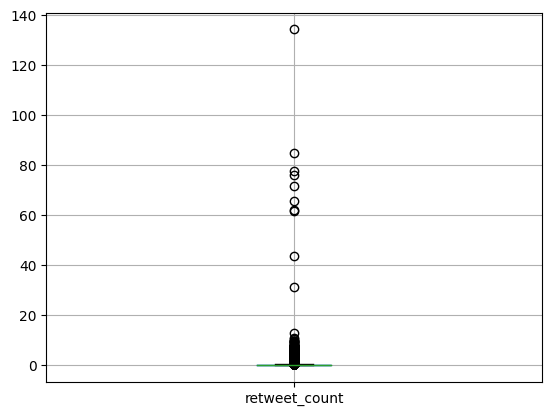

In [19]:
retweet_count_log_scale.boxplot(column='retweet_count')

Number of bins: 24


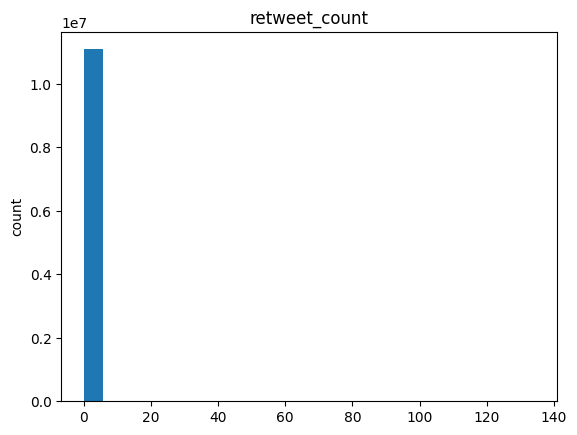

In [20]:
hist(retweet_count_log_scale, "retweet_count")

In [21]:
retweet_count_limited = df_tweets[df_tweets.retweet_count < 4000001]

<AxesSubplot: >

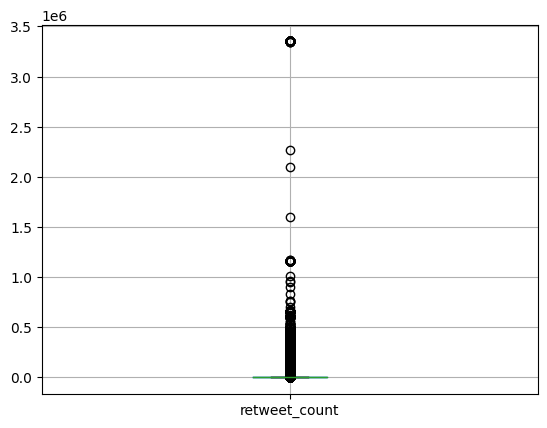

In [22]:
retweet_count_limited.boxplot(column='retweet_count')

Number of bins: 24


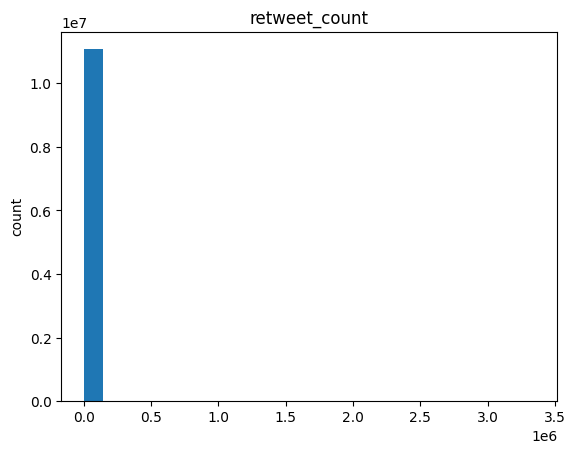

In [23]:
hist(retweet_count_limited, "retweet_count")

In [24]:
# compute the interquartile range and set the median to df.attr of the outliers 
def show_outliers(df, attr):
    Q1 = df[attr].quantile(0.25)
    Q3 = df[attr].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range
    print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)
    #filter = (df[attr] >= Q1 - 1.5 * IQR) & (df[attr] <= Q3 + 1.5 * IQR)
    #valid = df.loc[filter]
    filter = (df[attr] < Q1 - 1.5 * IQR) | (df[attr] > Q3 + 1.5 * IQR)
    outliers = df.loc[filter]
    
    print("We have", len(outliers), "outliers (over", len(df), "entries)")
    
    return outliers

<AxesSubplot: >

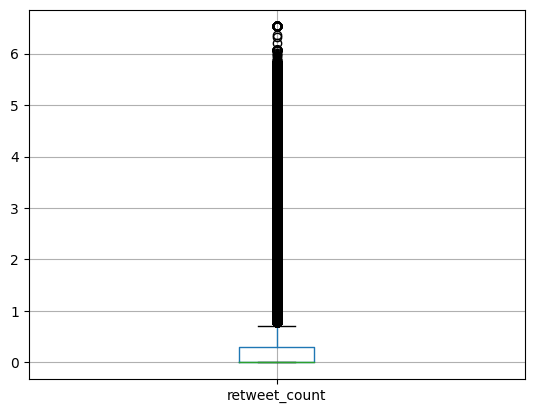

In [25]:
limited_retweet_count_log_scale = log_scale(retweet_count_limited, "retweet_count")
limited_retweet_count_log_scale.boxplot(column='retweet_count')

In [26]:
outliers = show_outliers(limited_retweet_count_log_scale, "retweet_count")

Q1: 0.0 Q3: 0.3010299956639812 IQR: 0.3010299956639812
We have 1529443 outliers (over 11086588 entries)


In [33]:
minOutlierValue = outliers.retweet_count.min()
minOutlierValue

0.7781512503836436

In [28]:
df_tweets.loc[outliers.index].retweet_count.min()

0.0

In [34]:
minOutliers = outliers[outliers.retweet_count == minOutlierValue]
minOutliers.head()

,retweet_count
id,
569163108129775616,0.778151
339665684097277952,0.778151
587316406338764802,0.778151
574713742962728960,0.778151
588568508012711936,0.778151


In [37]:
duplicated_indexes = df_tweets.duplicated()
outliers_with_bad_idx = outliers.index.isin(duplicated_indexes.index)

In [42]:
outliers_with_bad_idx.sum()

1529443

In [104]:
len(df_tweets.loc[outliers.index])

1540153

In [105]:
df_tweets.loc[outliers.index].describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.495046e+06,1.538688e+06,1.472062e+06,1.472179e+06,1.433363e+06,1.452508e+06,1.433429e+06
mean,9.384339e+08,4.147175e+03,3.948943e+03,2.477592e+03,4.883620e+89,4.543865e+69,2.381130e+03
std,9.236562e+08,3.772820e+04,3.494901e+06,2.497252e+06,5.846823e+92,5.476268e+72,2.527907e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.082007e+08,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,5.369236e+08,1.480000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.566113e+09,1.143000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,8.000000e+09,3.350111e+06,4.000000e+09,3.000000e+09,7.000000e+95,6.600000e+75,3.000000e+09


In [102]:
df_tweets.loc[outliers.index].retweet_count.min()

0.0

In [103]:
df_tweets.loc[outliers.index].retweet_count.max()

3350111.0

Number of bins: 24


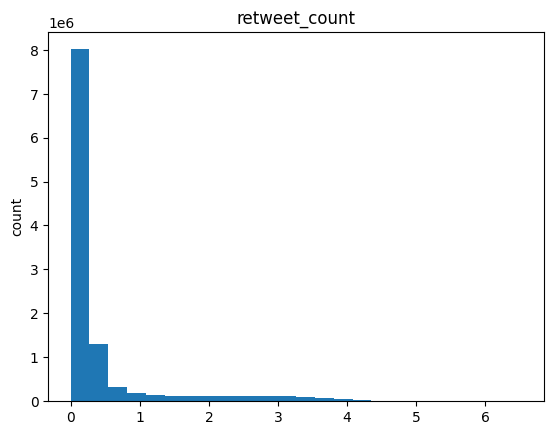

In [86]:
hist(limited_retweet_count_log_scale, "retweet_count")

In [47]:
# compute the interquartile range and set the median to df.attr of the outliers 
def process_outliers(df, attr):
    Q1 = df[attr].quantile(0.25)
    Q3 = df[attr].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range

    #filter = (df[attr] >= Q1 - 1.5 * IQR) & (df[attr] <= Q3 + 1.5 * IQR)
    #valid = df.loc[filter]
    filter = (df[attr] < Q1 - 1.5 * IQR) | (df[attr] > Q3 + 1.5 * IQR)
    outliers = df.loc[filter]
    
    print("We have", len(outliers), "outliers (over", len(df), "entries)")
    
    median = df[attr].median()
    print("Median with outliers:", median)
    df.loc[outliers.index, attr] = np.nan # set nan to outliers

    median = df[attr].median()
    print("Median without outliers:", median)
    
    df.loc[outliers.index, attr] = median # set the median to outliers
    return median

In [32]:
tweets_isna = df_tweets.isna()
tweets_isna.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,False,False,False,False,False,False,False,False,False
583002592529121280,False,False,False,False,False,False,False,False,False
461498835362013185,False,False,False,False,False,False,False,False,False
528808127366692864,False,False,False,False,False,False,False,False,False
575336690904006656,False,False,False,False,False,False,False,False,False


In [33]:
count_of_missing_val = tweets_isna.sum(axis = 1)

In [34]:
count_of_missing_val.max()

8

In [36]:
df_tweets[count_of_missing_val >= 5]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
487190144,NaN,1.0,NaN,NaN,NaN,0.0,NaN,2019-10-30 06:11:12,NaN
949116854133810,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2018-06-02 03:24:58,"@danloving it’a a rarity, for sure. but for cr..."
744248635197745,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2019-07-30 18:58:59,@perfectdkids i'm not a bad kid
6069950098142551,7.254514e+08,NaN,0.0,NaN,NaN,NaN,NaN,2020-03-01 03:45:28,"@todayisaray sorry, i was in the gym."
mar,2.211927e+09,0.0,NaN,NaN,NaN,NaN,NaN,2020-01-29 00:24:20,NaN
...,...,...,...,...,...,...,...,...,...
524128262,7.659171e+08,NaN,NaN,0.0,NaN,0.0,NaN,2020-04-04 05:47:00,NaN
6442256482,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-03-31 04:36:19,history in the making.
5992581,9.643556e+07,0.0,NaN,0.0,NaN,NaN,NaN,2019-10-22 12:10:26,NaN


In [38]:
%%time
number_of_good_entries = len(df_tweets[count_of_missing_val <= 4])
rows, cols = df_tweets.shape
print("Dropping", (rows - number_of_good_entries), "not good entries")
df_tweets = df_tweets[count_of_missing_val <= 4]

Dropping 656801 not good entries
CPU times: user 2.02 s, sys: 704 ms, total: 2.72 s
Wall time: 2.72 s


In [39]:
tweets_isna = df_tweets.isna()
count_of_missing_val = tweets_isna.sum(axis = 1)
tweets_isna.head()
count_of_missing_val.max()

4

In [40]:
df_tweets[count_of_missing_val >= 5]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,


In [41]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,3.277463e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang..."
583002592529121280,3.337229e+08,1.0,0.0,0.0,0.0,0.0,1.0,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit..."
461498835362013185,2.379756e+09,0.0,0.0,0.0,0.0,0.0,1.0,2019-05-02 13:34:31,@lolatcomedy awsome
528808127366692864,4.662269e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...
575336690904006656,1.355538e+09,114.0,0.0,0.0,1.0,0.0,1.0,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!
...,...,...,...,...,...,...,...,...,...
459163209170046976,8.657052e+06,0.0,0.0,1.0,0.0,0.0,1.0,2019-04-26 02:53:34,@_victoriamm twoot.
329829994169786368,2.209330e+08,0.0,0.0,0.0,0.0,0.0,0.0,2018-05-04 05:29:33,esta manana aun esta muy frio ! miren esto ! ...
588535254207467520,5.874910e+08,0.0,0.0,0.0,0.0,0.0,1.0,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ..."


In [42]:
df_tweets_duplicated = df_tweets.duplicated(keep="first")
print(df_tweets_duplicated.sum())

13786


In [43]:
df_tweets[df_tweets_duplicated]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
zocbjwsq,3.671254e+08,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-01 00:30:57,"â«ðð°ð¶ð½ð¾ ð½ðµ ñð¾, ññð¾ ñð´ðµð»ð°ð»ð¸ ..."
572049929700564992,5.637819e+08,0.0,0.0,0.0,1.0,1.0,1.0,2020-03-02 15:05:06,.@arieblitzmd: my video lecture on the 10 most...
467122382600011776,1.012081e+09,639.0,0.0,0.0,3.0,0.0,2.0,2019-05-18 02:00:29,"rt @johncena: time to hear from you, #wwe univ..."
589171465020387328,2.973667e+09,0.0,0.0,2.0,0.0,0.0,2.0,2020-04-18 20:59:58,@ellenpompeo @ellenpimpeo marina what did you ...
75562792835692914,3.873101e+06,0.0,0.0,0.0,0.0,0.0,0.0,NaT,=͟͟͞͞深=͟͟͞͞夜=͟͟͞͞徘=͟͟͞͞徊
...,...,...,...,...,...,...,...,...,...
mndqxvy,2.356949e+09,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-01 23:16:30,"""the best way to teach people is by telling a ..."
eexdktibbv,3.291884e+08,0.0,0.0,0.0,0.0,1.0,0.0,2019-09-14 16:07:39,fascinating history of espn http://t.co/rikzl...
519502996070490112,3.341657e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-10-09 15:02:20,making money is a hobby that will complement a...


In [42]:
duplicated_text = df_tweets[df_tweets.duplicated(['text'])]

In [43]:
duplicated_text

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
702764859,2.528823e+09,0.0,0.0,NaN,0.0,0.0,NaN,2020-03-25 03:41:01,NaN
524977054694256641,5.312194e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-10-24 17:34:18,"any style that nike makes in all black, shoe, ..."
514497968188444672,5.311671e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-25 19:34:09,"the lead car is absolutely unique, except for ..."
527884706415935489,5.854116e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-01 18:08:16,"""il mentitore dovrebbe tener presente che per ..."
5834174488,NaN,0.0,0.0,NaN,0.0,0.0,0.0,2019-07-10 16:01:23,"""il mentitore dovrebbe tener presente che per ..."
...,...,...,...,...,...,...,...,...,...
555379893504983040,1.397172e+07,0.0,0.0,0.0,1.0,1.0,0.0,2020-01-16 15:04:19,"my fitbit #fitstats_en_us for 1/13/2015: 2,541..."
838370060,4.662072e+08,0.0,0.0,NaN,NaN,0.0,0.0,2019-11-03 16:59:57,a volte mi piacerebbe sdoppiarmi per potermi a...
427109081338621952,2.272612e+09,1.0,0.0,3.0,0.0,0.0,0.0,2019-01-27 16:01:54,c'ã¨ un momento in cui sentire ed ascoltare si...
